In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import json
import nltk.data
from nltk.util import bigrams
from nltk.util import trigrams
from nltk.tokenize import TreebankWordTokenizer

sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
treebank_tokenizer = TreebankWordTokenizer()

import inflect
from nltk.corpus import stopwords
from nltk.util import ngrams

import collections
from collections import Counter
from collections import defaultdict
from collections import Iterable

In [2]:
#from wordcloud import WordCloud, STOPWORDS
#STOPWORDS.add("oh")

In [3]:
def process_description(text_object):
    #job_description = job_description_object["content"]
    #print(job_description)
    
    # take the job description text, and tokenize it
    tokens=treebank_tokenizer.tokenize(text_object)

    # you could also remove numbers and other noise tokens here too
    p = inflect.engine()
    new_tokens = []
    for token in tokens:
        token=token.lower()##convert all words to lowercase 
        if token.isdigit():##replace all interger occurrences with textual representation
            new_token = p.number_to_words(token)
            new_tokens.append(new_token)
        elif token not in stopwords.words('english') and token.isalpha(): ##remove stop words and punctuation  
            new_tokens.append(token)
    #print(new_tokens)
    return new_tokens
    

def bigrm_description(text_object):

    bigrm_tokens = nltk.bigrams(text_object)
    #bigrm_tokens=ngrams(new_tokens,2)
    #print(bigrm_tokens)
    bigram_collection=[]
    for bigrm in bigrm_tokens :
        #print(bigrm)
        bigram_collection.append(bigrm)
    #print(bigram_collection)
    
    return bigram_collection

def trigrm_description(text_object):

    bigrm_tokens = nltk.trigrams(text_object)
    #bigrm_tokens=ngrams(new_tokens,2)
    #print(bigrm_tokens)
    bigram_collection=[]
    for bigrm in bigrm_tokens :
        #print(bigrm)
        bigram_collection.append(bigrm)
    #print(bigram_collection)
    
    return bigram_collection

In [4]:
df_train = pd.read_csv('train_lyrics_1000.csv')
df_test = pd.read_csv('valid_lyrics_200.csv')

X_train = df_train['lyrics'].values 
y_train = df_train['mood'].values

X_test = df_test['lyrics'].values 
y_test = df_test['mood'].values

df_train.head()

,file,artist,title,lyrics,genre,mood,year
0,TRAAAAW128F429D538.h5,Casual,I Didn't Mean To,Verse One:\n\nAlright I might\nHave had a litt...,Hip Hop/Rap,sad,1994
1,TRAAAEF128F4273421.h5,Adam Ant,Something Girls,Adam Ant/Marco Pirroni\nEvery girl is a someth...,Rock,happy,1982
2,TRAAAFD128F92F423A.h5,Gob,Face the Ashes,"I've just erased it's been a while, I've got a...",Rock,sad,2007
3,TRAABJV128F1460C49.h5,Lionel Richie,Tonight Will Be Alright,Little darling \nWhere you've been so long \nI...,R&B,happy,1986
4,TRAABLR128F423B7E3.h5,Blue Rodeo,Floating,"Lead Vocal by Greg\n\nWell, these late night c...",Rock,sad,1987


In [5]:
all_words = []
for text in X_train:
    all_words.extend(process_description(text))
    
#all_words = bigrm_description(text)    
all_words_bigram = bigrm_description(all_words)
all_words_trigram = trigrm_description(all_words)

In [6]:
#all_job_description_words_bigram

In [7]:
#all_job_description_words

In [8]:
word_counter = collections.Counter()

tokens_freq = Counter(all_words)
common_tokens =tokens_freq.most_common(20)

bigram_freq = Counter(all_words_bigram)
common_bigram = bigram_freq.most_common(20)

trigram_freq = Counter(all_words_trigram)
common_trigram = trigram_freq.most_common(20)

In [9]:
#common_tokens

In [10]:
#common_bigram

In [11]:
#common_trigram

In [12]:
common_tokens_df=pd.DataFrame(common_tokens)
tokens=pd.Series(common_tokens_df[0])
freq_tokens=np.array(common_tokens_df[1])

Text(0.5, 1.0, 'Top 20 Words in Songs')

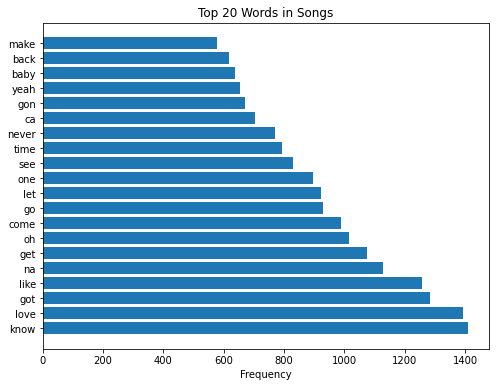

In [13]:
x = np.arange(len(tokens))
y = freq_tokens
plt.figure(figsize=(8,6))
plt.barh(x,y)
plt.yticks(x, tokens)
plt.xlabel('Frequency')
plt.title('Top 20 Words in Songs')

In [14]:
common_bigram_df=pd.DataFrame(common_bigram)
#common_trigram_df
bigram=pd.Series(common_bigram_df[0])
freq_bi=np.array(common_bigram_df[1])

Text(0.5, 1.0, 'Top 20 Bigrams in Songs')

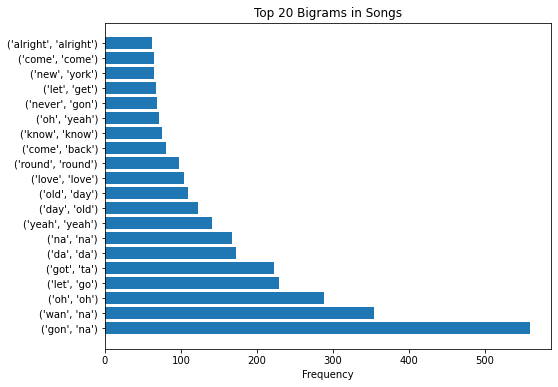

In [15]:
x = np.arange(len(bigram))
y = freq_bi
plt.figure(figsize=(8,6))
plt.barh(x,y)
plt.yticks(x, bigram)
plt.xlabel('Frequency')
plt.title('Top 20 Bigrams in Songs')

In [16]:
common_trigram_df=pd.DataFrame(common_trigram)
#common_trigram_df
trigram=pd.Series(common_trigram_df[0])
freq_tri=np.array(common_trigram_df[1])

Text(0.5, 1.0, 'Top 20 Trigrams in Songs')

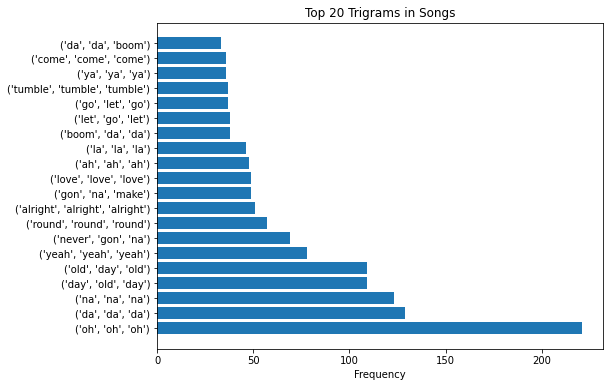

In [17]:
x = np.arange(len(trigram))
y = freq_tri
plt.figure(figsize=(8,6))
plt.barh(x,y)
plt.yticks(x, trigram)
plt.xlabel('Frequency')
plt.title('Top 20 Trigrams in Songs')